In [7]:
# author: Colin
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
tree_df = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv")

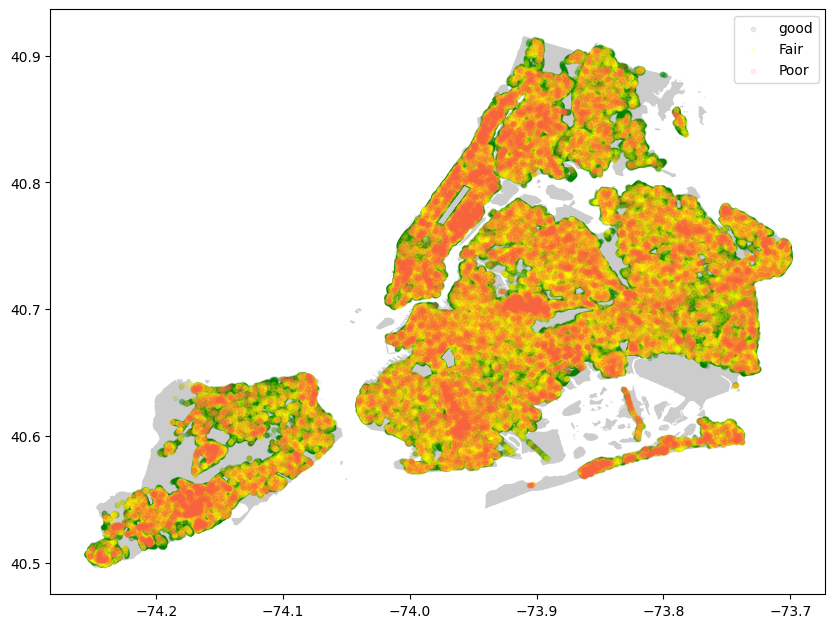

In [8]:
# 2.3 map for latitude and longitude
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame

# create geo dataframe
geometry = [Point(xy) for xy in zip(tree_df['longitude'], tree_df['latitude'])]
gdf = GeoDataFrame(tree_df[['health', 'longitude', 'latitude']], geometry=geometry)
#%% 2.3 map 
## source:
# https://geopandas.org/en/stable/docs/user_guide/geocoding.html

# get map of NY
ny_map = gpd.read_file(gpd.datasets.get_path('nybb'))
# plot
alpha = 0.1
markersize = 10
fig,ax=plt.subplots(figsize=(10,10))
ny_map.to_crs("EPSG:4326").plot(ax=ax,alpha=0.4,color="grey")
gdf[gdf['health']=="Good"].plot(ax=ax,markersize=markersize, alpha=alpha,color="green", label="good")
gdf[gdf['health']=="Fair"].plot(ax=ax,markersize=markersize, alpha=alpha,color="yellow", label="Fair")
gdf[gdf['health']=="Poor"].plot(ax=ax,markersize=markersize, alpha=alpha,color="tomato", label="Poor")
plt.legend()
plt.show()